In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

In [3]:
data = yf.download('STX4847-USD', start='2020-11-20', end='2022-11-20')

[*********************100%***********************]  1 of 1 completed


In [4]:
S = data['Adj Close'][-1]
print('The spot price is', round(S,2))

The spot price is 0.24


In [5]:
ADJ =  data['Adj Close']
ADJ.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 730 entries, 2020-11-20 to 2022-11-19
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
730 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


array([<AxesSubplot:xlabel='Date'>], dtype=object)

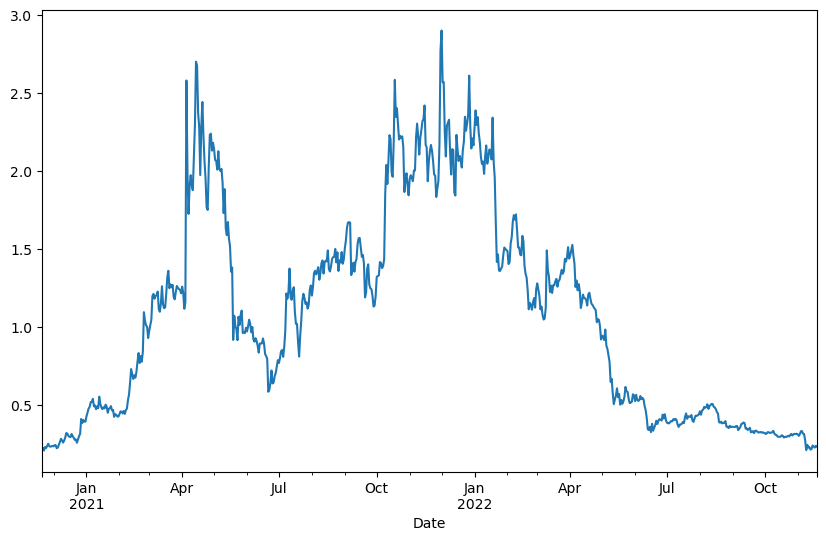

In [6]:
ADJ.plot(figsize=(10, 6), subplots=True)

In [7]:
data_1 = yf.download('STX4847-USD', start='2022-08-20', end='2022-11-20')

[*********************100%***********************]  1 of 1 completed


In [8]:
log_return = np.log(data_1['Adj Close'] / data_1['Adj Close'].shift(1))

In [9]:
vol = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 74.52 %


In [10]:
import numpy as np
import os

In [11]:
S0 = 0.236                 # spot stock price
K = 0.210                  # strike
T = 0.25                # maturity 
r = 0.03                # risk free rate 
sigma = 0.74            # diffusion coefficient or volatility
N = 5                   # number of periods or number of time steps  
payoff = "call"         # payoff 

In [12]:
dT = float(T) / N                             # Delta t
u = np.exp(sigma * np.sqrt(dT))               # up factor
d = 1.0 / u                                   # down factor 

In [13]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [14]:
S

array([[0.236     , 0.27846736, 0.32857656, 0.38770273, 0.45746845,
        0.53978826],
       [0.        , 0.20000908, 0.236     , 0.27846736, 0.32857656,
        0.38770273],
       [0.        , 0.        , 0.16950692, 0.20000908, 0.236     ,
        0.27846736],
       [0.        , 0.        , 0.        , 0.14365645, 0.16950692,
        0.20000908],
       [0.        , 0.        , 0.        , 0.        , 0.12174829,
        0.14365645],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.1031812 ]])

In [15]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4632422091263649

In [16]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00999092],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.06634355],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.1068188 ]])

In [17]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[0.02067446, 0.00831981, 0.00153811, 0.        , 0.        ,
        0.        ],
       [0.        , 0.03139482, 0.01419594, 0.00286985, 0.        ,
        0.        ],
       [0.        , 0.        , 0.0463259 , 0.02401049, 0.00535467,
        0.        ],
       [0.        , 0.        , 0.        , 0.06571449, 0.04017832,
        0.00999092],
       [0.        , 0.        , 0.        , 0.        , 0.08793695,
        0.06634355],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.1068188 ]])

In [18]:
print('European ' + payoff, str( V[0,0]))

European call 0.02067446486703199


In [19]:
def mcs_simulation_np(m,n):       #m is the number of steps and n is the number of simulation
    M = m
    I = n
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [20]:
S = mcs_simulation_np(90,1000)

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

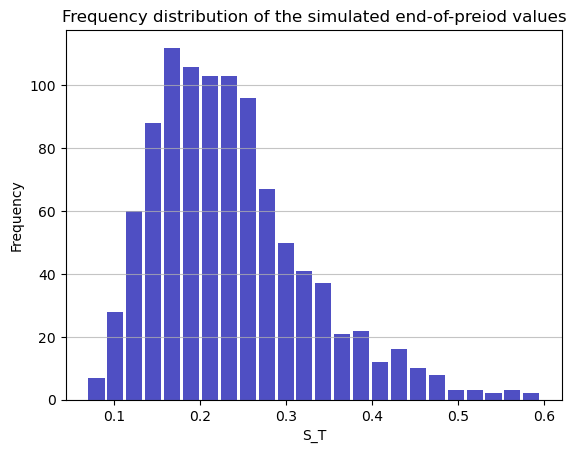

In [21]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[-1,:], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [22]:
p = np.mean(np.maximum(S[-1,:] - K,0))
print('European call', str(p))

European call 0.04702160892324865


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D

In [24]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    
    return delta

In [25]:
S = np.linspace(0.0, 1, 10)
T = np.linspace(0.1, 2, 11)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 0.210, T[i], 0.03, 0.00, 0.74, 'call')

C:\Users\astle\AppData\Local\Temp\ipykernel_10336\3549463239.py:3: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
C:\Users\astle\AppData\Local\Temp\ipykernel_10336\3549463239.py:4: RuntimeWarning: divide by zero encountered in log
  d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))


C:\Users\astle\AppData\Local\Temp\ipykernel_10336\3857024986.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


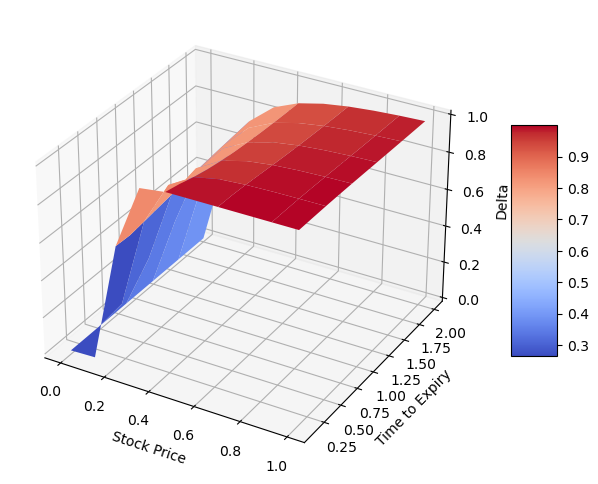

In [26]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [27]:
d = delta(0.236, 0.210, 0.25, 0.03, 0.00, 0.74, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.6987 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.6987 .


In [28]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [29]:
S = np.linspace(0.0, 1, 10)
T = np.linspace(0.1, 2, 11)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 0.210, T[i], 0.03, 0.00, 0.74, 'call')

C:\Users\astle\AppData\Local\Temp\ipykernel_10336\3514001409.py:3: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
C:\Users\astle\AppData\Local\Temp\ipykernel_10336\3514001409.py:4: RuntimeWarning: divide by zero encountered in log
  d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))


C:\Users\astle\AppData\Local\Temp\ipykernel_10336\383283098.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


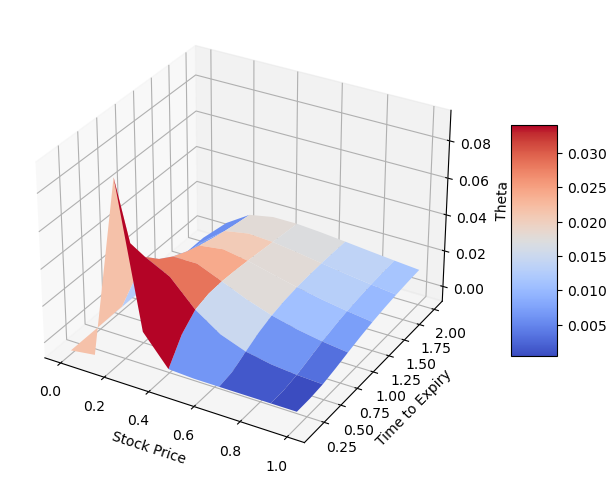

In [30]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [44]:
t = theta(0.236, 0.210, 0.25, 0.03, 0.00, 0.74, 'call')
print('The value of Theta is', t.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', t.round(4), '.')

The value of Theta is 0.0581 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.0581 .


In [32]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [33]:
S = np.linspace(0.0, 1, 10)
T = np.linspace(0.1, 2, 11)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 0.210, T[i], 0.03, 0.00, 0.74, 'call')

C:\Users\astle\AppData\Local\Temp\ipykernel_10336\4194007915.py:3: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
C:\Users\astle\AppData\Local\Temp\ipykernel_10336\4194007915.py:4: RuntimeWarning: divide by zero encountered in log
  d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))


C:\Users\astle\AppData\Local\Temp\ipykernel_10336\2235945349.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


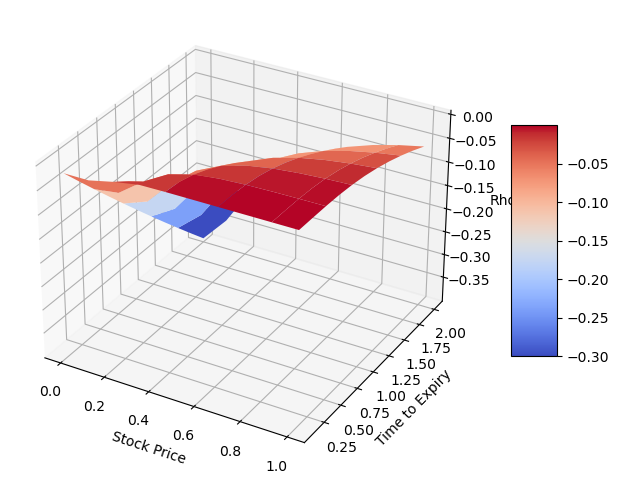

In [34]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [45]:
r = rho(0.236, 0.210, 0.25, 0.03, 0.00, 0.74, 'call')
print('The value of Rho is', r.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', r.round(4), '.')

The value of Rho is -0.0229 . If the stock price increase 1 dollar, then the value of the option will increase $ -0.0229 .


In [36]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [37]:
S = np.linspace(0.0, 1, 10)
T = np.linspace(0.1, 2, 11)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 0.210, T[i], 0.03, 0.00, 0.74, 'call')

C:\Users\astle\AppData\Local\Temp\ipykernel_10336\206645008.py:3: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))


C:\Users\astle\AppData\Local\Temp\ipykernel_10336\2704700163.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


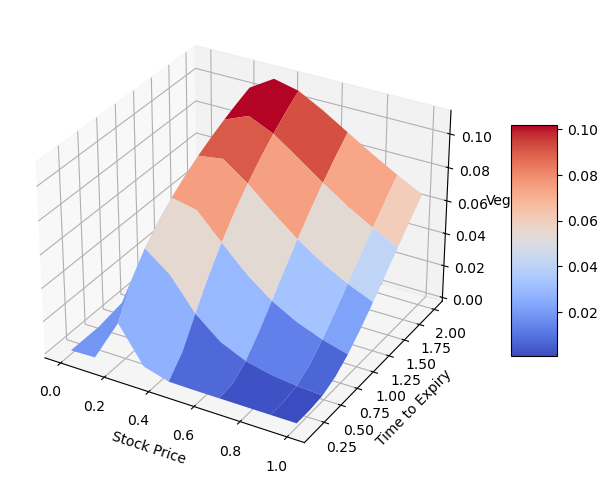

In [38]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [39]:
v = vega(0.236, 0.210, 0.25, 0.03, 0.00, 0.74, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is 0.0411 . If the volatility increases 1%, then the value of the option will increase $ 0.00041099999999999996 .


In [40]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [41]:
S = np.linspace(0.0, 1, 10)
T = np.linspace(0.1, 2, 11)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 0.210, T[i], 0.03, 0.00, 0.74, 'call')

C:\Users\astle\AppData\Local\Temp\ipykernel_10336\4045853682.py:3: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
C:\Users\astle\AppData\Local\Temp\ipykernel_10336\4045853682.py:4: RuntimeWarning: invalid value encountered in double_scalars
  speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))


C:\Users\astle\AppData\Local\Temp\ipykernel_10336\1603304871.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


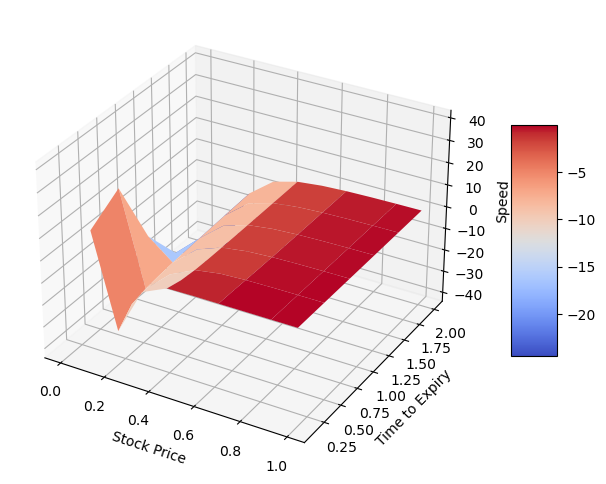

In [42]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [46]:
s = speed(0.236, 0.210, 0.25, 0.03, 0.00, 0.74, 'call')
print('The value of Speed is', s.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', s.round(4)*0.01, '.')

The value of Speed is -20.3479 . If the volatility increases 1%, then the value of the option will increase $ -0.203479 .
